In [2]:
import random
import time
from matplotlib import pyplot as plt

In [ ]:
class BinaryTreeNode:

    def __init__(self, key, value, parent=None):
        self.key = key
        self.value = value
        self.lc = None
        self.rc = None
        self.parent = parent
        self.depth = 0
    
    def __repr__(self):
        return f"Key: {self.key}, Value: {self.value} "
    def setParent(self, parent):
        self.parent = parent

    def setDepth(self, depth):
        self.depth = depth

    def setLC(self, node):
        self.lc = node
        node.setParent(self)
    
    def setRC(self, node):
        self.rc = node
        node.setParent(self)
    
    def getValue(self):
        return self.value
    
    def getKey(self):
        return self.key
    
    def getDepth(self):
        return self.depth
    
    def hasParent(self):
        #True if self.parent != None else False
        if self.parent == None:
            return False
        return True
    
    def hasChildren(self):
        if self.rc == None and self.lc == None:
            return False
        return True
    
    def replaceChild(self, oldChild, newChild = None):
        if(oldChild.getKey() < self.getKey()):
            self.lc = newChild
        else:
            self.rc = newChild
    
        


In [ ]:
class BSTRee:
    def __init__(self, key, value):
        self.root = BinaryTreeNode(key, value)
        self.allNodes = {key: self.root}
    
    def clear(self):
        self.root = None
        self.allNodes = {}
    
    def add(self, key, value, rootNode=None, depth=0, newNode = None):

        
        if newNode == None and self.hasKey(key):
            self.allNodes[key].value = value
            return
        
        if newNode == None:
            newNode = BinaryTreeNode(key, value)
            self.allNodes[key] = newNode

        if self.root == None:
            self.root = newNode
            return
        
        if rootNode == None:
            rootNode = self.root
        
        depth += 1
        if newNode.getKey() < rootNode.getKey():
            self.addLeft(rootNode, newNode, depth)
        else:
            self.addRight(rootNode, newNode, depth)


    def addLeft(self, rootNode, newNode, depth):
        
        if rootNode.lc == None:
            newNode.depth = depth
            newNode.setParent(rootNode)
            rootNode.setLC(newNode)
            return
        
        self.add( None, None, rootNode=rootNode.lc, depth=depth, newNode=newNode)
    
    def addRight(self, rootNode, newNode, depth):
        
        if rootNode.rc == None:
            newNode.depth = depth
            newNode.setParent(rootNode)
            rootNode.setRC(newNode)

            return
        
        self.add(None, None,rootNode=rootNode.rc, depth=depth, newNode=newNode)

    def isRoot(self, node):
        return self.root.key == node.key
    
    
    def resetNode(self, oldNode, newNode):
        """
        if oldNode is root, replace root with new node
        otherwise, change old node's child from old node to new node
        """
        if self.isRoot(oldNode):
            self.root = newNode
            newNode.setParent(None)
            return
        oldNode.parent.replaceChild(oldNode, newChild = newNode)
        newNode.setParent(oldNode.parent)
        
    
    

    def removeNode(self, key):
        if not self.hasKey(key):
            raise Exception(f"Key not found: {key}")
        
        if self.size() == 1:
            self.root = None
            return self.allNodes.pop(key)

        removedNode = self.allNodes[key]
        isRoot = self.root.key == key

        #case 1: if node has no children
        if not removedNode.hasChildren():
            removedNode.parent.replaceChild(removedNode)
            return self.allNodes.pop(key)
        
        #case 3: if node has 2 children
        if removedNode.lc != None and removedNode.rc != None:
            successor = self.getSuccessor(removedNode)
            
            self.resetNode(removedNode, successor)
            return self.allNodes.pop(key)
        
        #case 2: if node has 1 child
        #subcase 1: 1 left child
        if removedNode.lc != None:
            self.resetNode(removedNode, removedNode.lc)
            removedNode.lc = None
            return self.allNodes.pop(key)
        
        #subcase 2: 1 right child
        if removedNode.rc != None:
            self.resetNode(removedNode, removedNode.rc)
            removedNode.rc = None
            return self.allNodes.pop(key)
        
    #fuck it, I'm too lazy to think of something more efficient
    def resetDepth(self, node):
        depth = 0
        curNode = node
        while curNode.hasParent():
            curNode = curNode.parent
            depth+=1
        node.setDepth(depth)
        return depth

    def resetAllDepth(self):
        for node in self.allNodes.values():
            self.resetDepth(node)

    def remove(self, key):
        self.removeNode(key)
        self.resetAllDepth()


    
    def getSuccessor(self, targetNode):

        successor = targetNode.rc
        while successor.lc != None:
            successor = successor.lc
        
        successor =  self.removeNode(successor.key)
        successor.lc = targetNode.lc
        successor.rc = targetNode.rc
        successor.lc.parent = successor
        successor.rc.parent = successor
        return successor

    
    def getDepth(self):
        return max(list(map(lambda node: node.getDepth(), self.allNodes.values())))
    
    def size(self):
        return len(self.allNodes)

    def hasKey(self, key):
        return True if key in self.allNodes else False
    
    def quickGet(self, key):
        if not self.hasKey(key):
            raise Exception(f"Key not found: {key}")
        return self.allNodes[key].getValue()
    
    def get(self, key, rootnode=None):
        if rootnode == None:
            rootnode = self.root
        if key == rootnode.key:
            return rootnode.getValue()
        
        if key > rootnode.key:
            rootnode = rootnode.rc
        elif key < rootnode.key:
            rootnode = rootnode.lc
        
        if rootnode == None:
            raise Exception(f"Key not found: {key}")
        
        return self.get(key, rootnode=rootnode)
    

    



In [5]:
myTree = BSTRee(17, 17)
numbers = [ 10, 30, 5, 12, 18, 51, 19, 20]
for idx, number in enumerate(numbers):
    myTree.add(number, number)
myTree.remove(17)
print(myTree.root.depth)

2


In [ ]:
from collections import deque

def print_bst_visual(tree):
    if not tree.root:
        print("The tree is empty.")
        return

    # Queue for level-order traversal
    queue = deque([(tree.root, 0)])  # (node, level)
    current_level = 0
    level_nodes = []

    while queue:
        node, level = queue.popleft()

        # If we move to a new level, print the previous level
        if level != current_level:
            print("Level", current_level, ":", " ".join(level_nodes))
            level_nodes = []
            current_level = level

        # Add the current node's key to the level's list
        level_nodes.append(str(node.key))

        # Add children to the queue
        if node.lc:
            queue.append((node.lc, level + 1))
        if node.rc:
            queue.append((node.rc, level + 1))

    # Print the last level
    if level_nodes:
        print("Level", current_level, ":", " ".join(level_nodes))

# Example usage
myTree = BSTRee(17, 17)
numbers = [10, 30, 5, 12, 18, 51, 19, 20]
for number in numbers:
    myTree.add(number, number)

print_bst_visual(myTree)

Level 0 : 17
Level 1 : 10 30
Level 2 : 5 12 18 51
Level 3 : 19
Level 4 : 20


Prediction: The BST associated with the sorted list will require more time to insert and retrieve values than the BST associated with the randomly ordered list. This is because in the BST sorted list, each new node will be greater than the node previously added, so each node will be the right child of its parent node. This will make the tree only as efficient as a linked list, where adding a new item and retrieving an item will have a linear time complexity... If I coded the tree normally. Because I store each tree node in a hashmap where the key is a node's key, retrieving any node will take constant time, regardless of how the tree is structured. Adding an item to a tree created from a randomly sorted list will take logmarithmic time complexity at best and linear time complexity at worst, and retrieving an item from that tree will still take constant time. 

To make this testing more informative, I create a standard search function that traverses the tree to find a given key. This operation will take on average logn time to find a node in the randomly ordered tree and on average linear time to find a node in the sorted tree.

In [7]:
def generateRandomKeyList(len, max):
    return [random.randint(0, max) for _ in range(len)]

In [8]:
def avgInsertionTime(tree, items):
    tree.clear()
    times = [None] * (len(items))
    for idx, item in enumerate(items):
        start = time.time()
        tree.add(item, 1)
        end = time.time()
        times[idx] = end - start
    return sum(times) / len(times)

def avgRetrievalTime(tree, items):
    times = [None] * len(items)
    for idx, item in enumerate(items):
        start = time.time()
        tree.get(item)
        end = time.time()
        times[idx] = end - start
    return sum(times) / len(times)


In [ ]:
#testing
items =  generateRandomKeyList(1000, 3000)
avgSortedInsertionTime = [None] * len(items)
avgUnsortedInsertionTime = [None] * len(items)
avgSortedRetrievalTime = [None] * len(items)
avgUnsortedRetrievalTime = [None] * len(items)
for i in range(1, len(items)):
    keys = items[:i]
    tree = BSTRee(-1, -1)
    avgUnsortedInsertionTime[i] = avgInsertionTime(tree, keys)
    avgUnsortedRetrievalTime[i] = avgRetrievalTime(tree, keys)
    keys.sort()
    avgSortedInsertionTime[i] = avgInsertionTime(tree, keys)
    avgSortedRetrievalTime[i] = avgRetrievalTime(tree, keys)


Prediction: 
Unsorted BST insertion: O(logn) time complexity - best case scenario, the tree will have to traverse down n layers for every 2^n added nodes (worst case scenario, the code will have to travel down n layers for every nth newly added node, but this will only occur if the list happens to be completely sorted). Since the tree is unbalanced, some items will have to traverse deeper in the list than others, causing some spikes and dips on the graph, but on average, the time complexity will be O(n)

Unsorted BST retrieval: O(logn) time complexity - Best case scenario, as the code cycles further into the list of nodes to retrieve, the code will have to traverse down n layers for every 2^n that were added prior to the item being searched for. Worst case scenario is O(n), but again, this will only happen if the list is completely sorted. There may be some spikes/dips in the retrieval where the tree is unbalanced, but on average, the time complexity will be O(n)

Sorted BST insertion/retrieval: O(n) time complexity - Since the list is completely sorted, each node will only have right children, making the retrieval+insertion time complexity equivalent to the retrieval+end insertion time complexity for a linked list. The list will have to traverse each node before adding a new one, and to find a node, the list will have to traverse through each smaller node.

Text(0.5, 1.0, 'Average Unsorted Insertion Time')

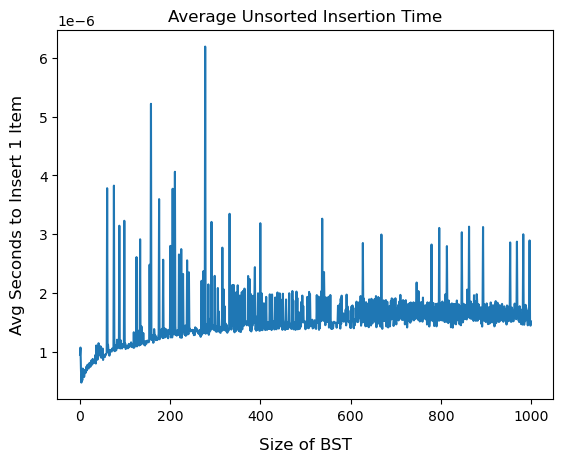

In [10]:
plt.plot(avgUnsortedInsertionTime)
plt.xlabel("Size of BST", fontsize=12, labelpad=10)
plt.ylabel("Avg Seconds to Insert 1 Item", fontsize=12, labelpad=10)
plt.title("Average Unsorted Insertion Time")

Text(0.5, 1.0, 'Average Unsorted Retrieval Time')

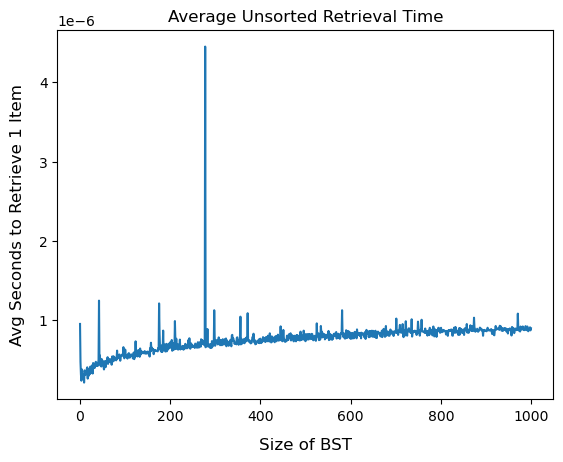

In [11]:
plt.plot(avgUnsortedRetrievalTime)
plt.xlabel("Size of BST", fontsize=12, labelpad=10)
plt.ylabel("Avg Seconds to Retrieve 1 Item", fontsize=12, labelpad=10)
plt.title("Average Unsorted Retrieval Time")

Text(0.5, 1.0, 'Avg Sorted Insertion Time')

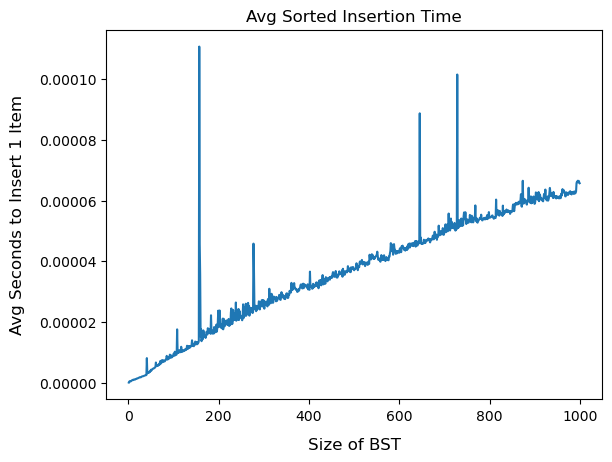

In [12]:
plt.plot(avgSortedInsertionTime)
plt.xlabel("Size of BST", fontsize=12, labelpad=10)
plt.ylabel("Avg Seconds to Insert 1 Item", fontsize=12, labelpad=10)
plt.title("Avg Sorted Insertion Time")

Text(0.5, 1.0, 'Avg Sorted Retrieval Time')

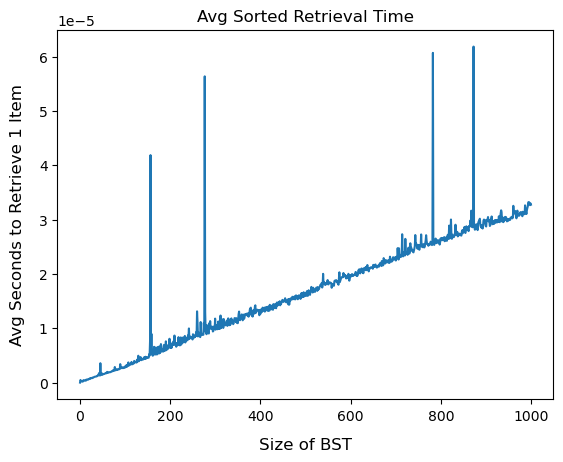

In [13]:
plt.plot(avgSortedRetrievalTime)
plt.xlabel("Size of BST", fontsize=12, labelpad=10)
plt.ylabel("Avg Seconds to Retrieve 1 Item", fontsize=12, labelpad=10)
plt.title("Avg Sorted Retrieval Time")

These graphs represent more or less my prediction, where unsorted insertion/retrieval time complexity is on average O(logn) and sorted insertion/retrieval time complexity is O(n). I don't have a solid explanation for the major spikes in each graph - my guess would be the python compiler taking extra time to load more memory (or something like that), but nothing in my code should cause those spikes to happen (I think)